# ID5841 Quantum Computing Lab
## Assignment: 1

### Haricharan B
### EP21B015

# Importing Libraries and Initializing Backends

In [1]:
# Importing desired libraries required for the program
!pip --quiet install qiskit_experiments;

import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.visualization import plot_histogram, plot_state_city
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import qiskit_experiments


[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
service = QiskitRuntimeService()

# Using two samplers, one for simulation and one for IBMQ machines
simulation_sampler = Sampler(service.least_busy(simulator=True,operational=True))
machine_sampler = Sampler(service.least_busy(simulator=False,operational=True))

#  Initializing some backends which we'll need later
statevector_backend = qiskit.BasicAer.get_backend('statevector_simulator')
qasm_backend = qiskit.Aer.get_backend('qasm_simulator')

# Question 1
## Building some basic states
### a)

- First, the 0th qubit is passed through a hadamard gate to generate $\frac 1 {\sqrt{2}} |00 \rangle + \frac 1 {\sqrt{2}} |01 \rangle$
- A CNOT gate is used, with the control bit being 0th qubit, acting on 1st qubit, to generate the state $\frac 1 {\sqrt{2}} |00 \rangle + \frac 1 {\sqrt{2}} |11 \rangle$

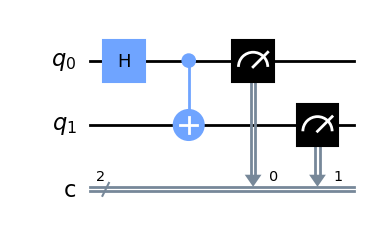

In [3]:
# Creating the desired circuit as given in the question

qca = qiskit.QuantumCircuit(2, 2)

qca.h(0)
qca.cnot(0, 1)

qca.measure(0, 0)
qca.measure(1, 1)

qca.draw()

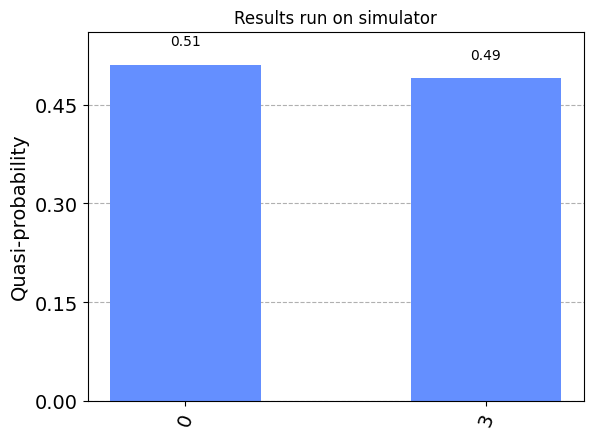

In [4]:
# Plotting the results obtained side-by-side, to ensure that they match

fig, axes = plt.subplots(1, 1)

joba_simulation = simulation_sampler.run(qca)
plot_histogram(joba_simulation.result().quasi_dists, ax = axes)
axes.set_title("Results run on simulator");

# joba_machine = machine_sampler.run(qca)
# plot_histogram(joba_machine.result().quasi_dists, ax = axes[1])

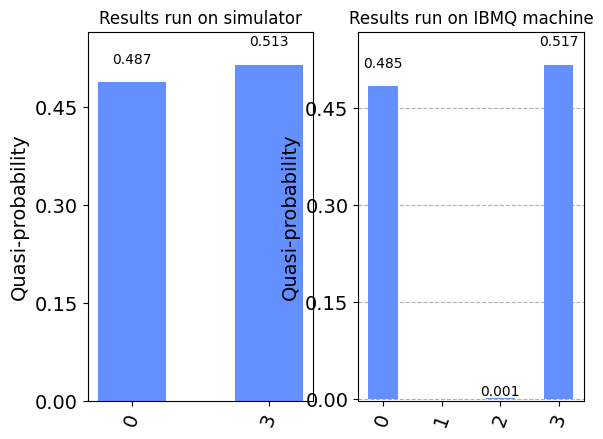

In [5]:
# Retrieving Job Results and plotting results side-by-side

fig, axes = plt.subplots(1, 2)

jobb_simulation = simulation_sampler.run(qca)
plot_histogram(jobb_simulation.result().quasi_dists, ax = axes[0])
axes[0].set_title("Results run on simulator");

jobb_machine = service.job('cm7ydh6sm080008vd7e0')
plot_histogram(jobb_machine.result().quasi_dists, ax = axes[1])
axes[1].set_title("Results run on IBMQ machine");

# Question 1
## Building some basic states
### b)

- The 0th qubit is passed through NOT gate to generate $\frac 1 {\sqrt{2}} |01 \rangle$
- The 0th qubit is passed through a hadamard gate to generate $\frac 1 {\sqrt{2}} |00 \rangle - \frac 1 {\sqrt{2}} |01 \rangle$
- A CNOT gate is used, with the control bit being 0th qubit, acting on 1st qubit, to generate the state $\frac 1 {\sqrt{2}} |00 \rangle - \frac 1 {\sqrt{2}} |11 \rangle$
- The 1st qubit is passed through NOT gate to generate $\frac 1 {\sqrt{2}} |10 \rangle - \frac 1 {\sqrt{2}} |01 \rangle$ (which is the same thing required in the question, except for an overall phase)

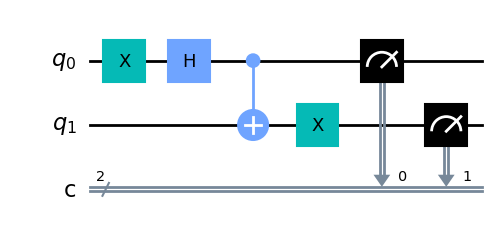

In [6]:
# Creating the desired circuit as given in the question

qcb = qiskit.QuantumCircuit(2, 2)

qcb.x(0)
qcb.h(0)
qcb.cnot(0, 1)
qcb.x(1)

qcb.measure(0, 0)
qcb.measure(1, 1)

qcb.draw()

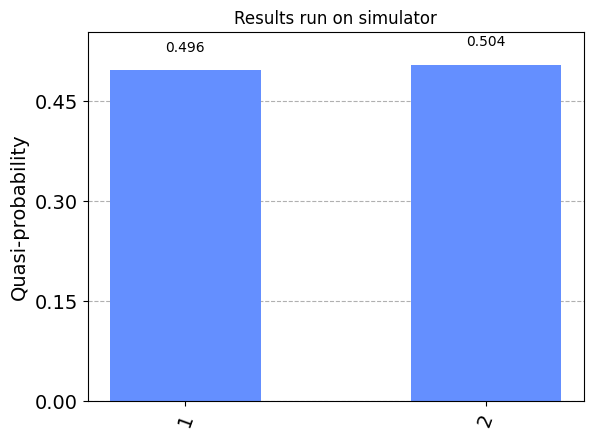

In [7]:
# Plotting the results obtained side-by-side, to ensure that they match

fig, axes = plt.subplots(1, 1)

jobb_simulation = simulation_sampler.run(qcb)
plot_histogram(jobb_simulation.result().quasi_dists, ax = axes)
axes.set_title("Results run on simulator");

# jobb_machine = machine_sampler.run(qcb)
# plot_histogram(jobb_machine.result().quasi_dists, ax = axes[1])

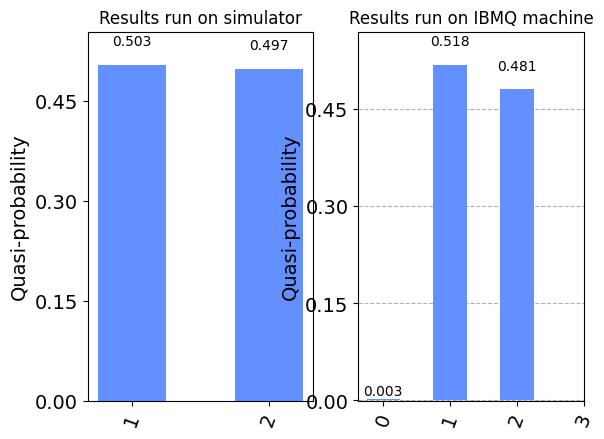

In [8]:
# Retrieving Job Results

fig, axes = plt.subplots(1, 2)

jobb_simulation = simulation_sampler.run(qcb)
plot_histogram(jobb_simulation.result().quasi_dists, ax = axes[0])
axes[0].set_title("Results run on simulator");

jobb_machine = service.job('cm7yebhbxrbg0089j340')
plot_histogram(jobb_machine.result().quasi_dists, ax = axes[1])
axes[1].set_title("Results run on IBMQ machine");

# Question 2
## Using QST
 
### a)


- We use a NOT gate on qubit 0 to obtain $| 01 \rangle$
- We use a Hadamard gate on qubit 0 to obtain  $\frac 1 {\sqrt{2}} |00 \rangle - \frac 1 {\sqrt{2}} |01 \rangle$
- We use a CNOT gate on qubit 1 with control qubit 0 to get the desired state

We then use QST to verify the results, and we get a fidelity close to 1

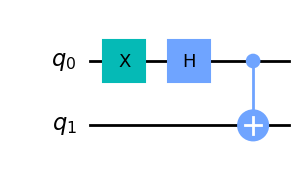

In [9]:
# Question 2


# Defining the desired quantum circuit
qc = qiskit.QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cnot(0, 1)

qc.draw()

[ 0.70710678+0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j -0.70710678-8.65956056e-17j]
Fidelity =  0.9889669635196119


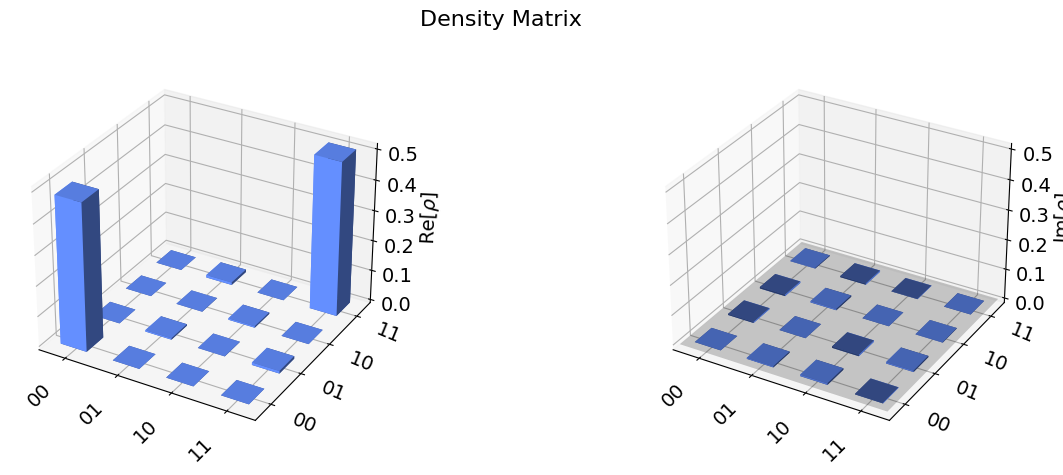

In [10]:
# Calculating the output using statevector backend
result = qiskit.execute(qc, statevector_backend).result()
state = result.get_statevector()
print(state)

# Calculating the output using QASM backend and state tomography
state_tomography_circuit = qiskit_experiments.library.StateTomography(qc)
result = state_tomography_circuit.run(qasm_backend)
rho = result.analysis_results('state').value

# Calculating the Fidelity
F = qiskit.quantum_info.state_fidelity(state, rho)
print('Fidelity = ', F)

# Plotting the output in state city
plot_state_city(rho, title='Density Matrix')

# Question 2
## Using QST
 
### b)


- We use a Hadamard gate on qubit 0 to obtain $\frac 1 {\sqrt{2}} |00 \rangle + \frac 1 {\sqrt{2}} |01 \rangle$
- We use a CNOT gate on qubit 1 with control qubit 0 to get the desired state to obtain $\frac 1 {\sqrt{2}} |00 \rangle + \frac 1 {\sqrt{2}} |11 \rangle$
- We use a NOT gate on qubit 1 to obtain $\frac 1 {\sqrt{2}} |10 \rangle + \frac 1 {\sqrt{2}} |01 \rangle$

We then use QST to verify the results, and we get a fidelity close to 1

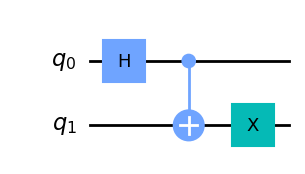

In [11]:
# Question 2

# Defining the desired quantum circuit
qc = qiskit.QuantumCircuit(2)
qc.h(0)
qc.cnot(0, 1)
qc.x(1)
qc.draw()

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Fidelity =  0.9943401386689421


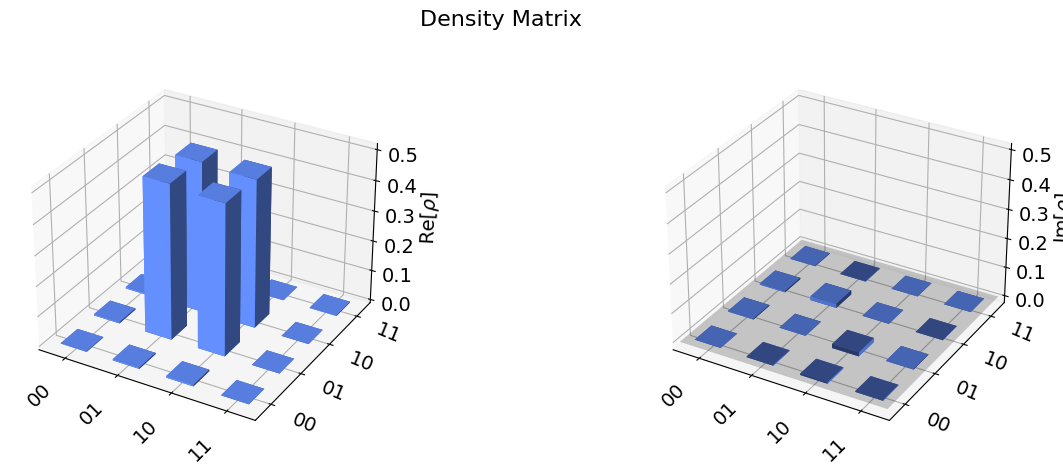

In [12]:
# Calculating the output using statevector backend
result = qiskit.execute(qc, statevector_backend).result()
state = result.get_statevector()
print(state)

# Calculating the output using QASM backend and state tomography
state_tomography_circuit = qiskit_experiments.library.StateTomography(qc)
result = state_tomography_circuit.run(qasm_backend)
rho = result.analysis_results('state').value

# Calculating the Fidelity
F = qiskit.quantum_info.state_fidelity(state, rho)
print('Fidelity = ', F)

# Plotting the output in state city
plot_state_city(rho, title='Density Matrix')

# Question 3
## GHZ state

- First, the Hadamard gate is applied on the 0th qubit, yielding $\frac 1 {\sqrt 2} | 000 \dots 00\rangle + \frac 1 {\sqrt 2} | 000 \dots 01\rangle$
- Now, n - 1 CNOT operations are carried out, with the control bit being the (i - 1)th bit and the gate acting on the ith bit for i from 1 to n
- This gives us the desired state $\frac 1 {\sqrt 2} | 000 \dots 00\rangle + \frac 1 {\sqrt 2} | 111 \dots 11\rangle$

Displayed below is the circuit for $n = 3, 4$, and the same pattern is observed for $n = 10$ also.

In [13]:
# Question 3

# Creating a function that designs the GHZ state for any general n
def ghz_state(n):        

    # Configuring matplotlib
    fig, ax = plt.subplots(1, 2)
    fig.subplots_adjust(wspace = 0.4)
    fig.suptitle(f"GHZ state for n = {n}")
    ax[0].set_title("Circuit")
    ax[1].set_title("Histogram")
 
    # Initializing the quantum circuit with n classical bits and n qubits
    qc = qiskit.QuantumCircuit(n, n)

    # Hadamard gate on 0th qubit
    qc.h(0)

    # n - 1 CNOT gates
    for i in range(1, n):
        qc.cnot(i - 1, i)

    # measuring all qubits
    for i in range(n):    
        qc.measure(i, i)

    # Simulating the circuit
    fig = qc.draw(output = 'mpl', ax = ax[0])        
    job_simulation = simulation_sampler.run(qc)
    plot_histogram(job_simulation.result().quasi_dists, ax = ax[1]);
    plt.show();

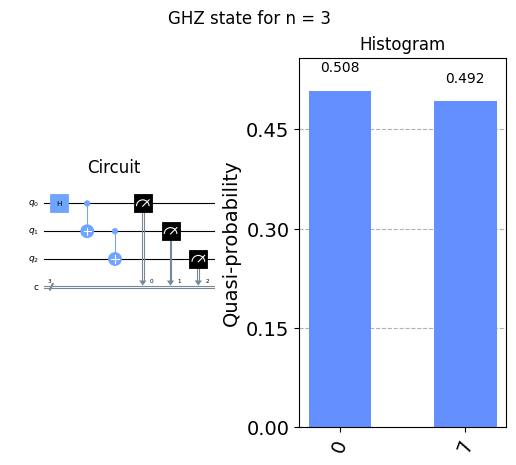

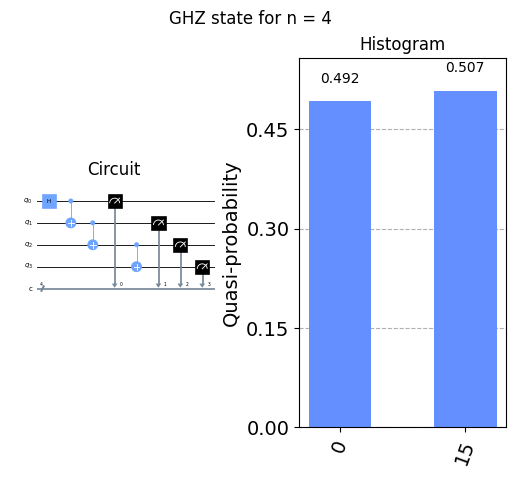

In [14]:
# For n = 3 and n = 4
ghz_state(3)
ghz_state(4)

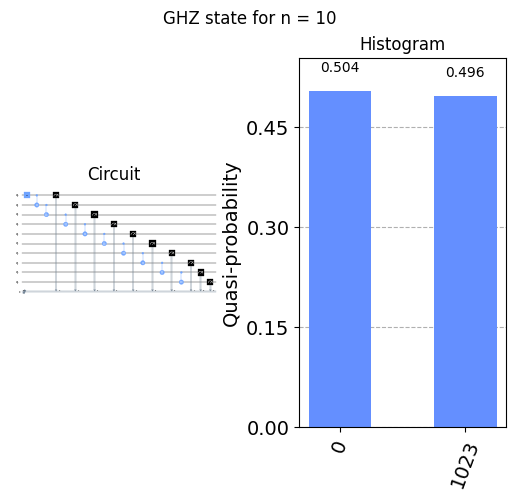

In [15]:
# Circuit for n = 10
ghz_state(10)

# Question-4
## Exploring the W-state

- Initially, we carry out rotation of the 0th qubit by an angle `theta`, which is equal to $2 \cos^{-1} \left(\frac{1}{\sqrt{3}} \right)$. This would give us the state $\sqrt{\frac 13} |000 \rangle + \sqrt{\frac 23} |001 \rangle$.
- We use a controlled Hadamard gate (where control bit is 0th qubit and it acts on the first qubit), which yields us $\sqrt{\frac 13} |000 \rangle + \sqrt{\frac 13} |001 \rangle + \sqrt{\frac 13} |011 \rangle$.
- Now, we use two CNOT gates in succession and a NOT gate to get $\sqrt{\frac 13} |001 \rangle + \sqrt{\frac 13} |010 \rangle + \sqrt{\frac 13} |100 \rangle$.

We use a simulator here.

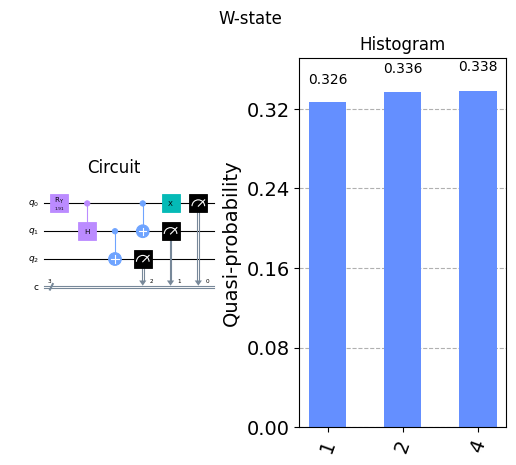

In [16]:
# Question 4

# Some configurations of matplotlib
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(wspace = 0.4)
fig.suptitle("W-state")
ax[0].set_title("Circuit")
ax[1].set_title("Histogram")

# Defining the quantum circuit as described above
qc = qiskit.QuantumCircuit(3, 3)
theta = 2 * np.arccos(1/np.sqrt(3))
qc.ry(theta, 0)
qc.ch(0, 1)
qc.cnot(1, 2)
qc.cnot(0, 1)
qc.x(0)
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

# Drawing the quantum circuit
qc.draw(output = 'mpl', ax = ax[0])        

# Running the program on a simulator
job_simulation = simulation_sampler.run(qc)
plot_histogram(job_simulation.result().quasi_dists, ax = ax[1]);   
plt.show();

## Using QST to verify the output 

Both statevector simulator and Quantum State Tomography yield the same result, and we get fidelity very close to 1, as expected.

In [17]:
qc = qiskit.QuantumCircuit(3, 3)
theta = 2 * np.arccos(1/np.sqrt(3))
qc.ry(theta, 0)
qc.ch(0, 1)
qc.cnot(1, 2)
qc.cnot(0, 1)
qc.x(0)

# Calculating the output using statevector backend
result = qiskit.execute(qc, statevector_backend).result()
state = result.get_statevector()
print(state)

# Calculating the output using QASM backend and state tomography
state_tomography_circuit = qiskit_experiments.library.StateTomography(qc)
result = state_tomography_circuit.run(qasm_backend)
rho = result.analysis_results('state').value

# Calculating the Fidelity
F = qiskit.quantum_info.state_fidelity(state, rho)
print('Fidelity = ', F)

[0.        +0.00000000e+00j 0.57735027+4.80740672e-17j
 0.57735027+0.00000000e+00j 0.        +0.00000000e+00j
 0.57735027+5.55111512e-17j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j]
Fidelity =  0.9775958886695504
